In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, plot_confusion_matrix


warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>


In [2]:
test_data = pd.read_csv('test.csv', index_col=0)
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

# Поиск выбросов

In [4]:
# признак  | значения
def printValues(data = data):
    for col in data: #[['model', 'transmission', 'fuelType']]:
        values = data[col].unique()
        str_values = str(values)
        if len(str_values) > 300:
            str_values = str_values[:200] + '...'
        print(col, ':', len(values), '\n', str_values, '\n')
        
printValues()

Gender : 2 
 ['Female' 'Male'] 

Senior : 2 
 [0 1] 

Married : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['Yes' 'No'] 

Tenure : 73 
 [67 34 72 63 69  3 68  2 19 41 54 36 10 12 18 38 65  8  9 35 44  1 16 70
 57 47 33 24 55 43 11 71 60 15  7 66 17 58 23  6 14 48 39 50 13 52 27 37
 26  5 30 51 29 46 45 49 21 56 22 64 25 61  4 53 32 40 28 59 62 31 20 42
  0] 

Phone : 2 
 ['No' 'Yes'] 

MultiplePhones : 3 
 ['No phone service' 'Yes' 'No'] 

Internet : 3 
 ['DSL' 'Fiber optic' 'No'] 

Security : 3 
 ['Yes' 'No' 'No internet service'] 

Backup : 3 
 ['Yes' 'No' 'No internet service'] 

Insurance : 3 
 ['Yes' 'No' 'No internet service'] 

Support : 3 
 ['Yes' 'No' 'No internet service'] 

TV : 3 
 ['Yes' 'No' 'No internet service'] 

Movies : 3 
 ['No' 'Yes' 'No internet service'] 

Contract : 3 
 ['Two year' 'One year' 'Month-to-month'] 

EBilling : 2 
 ['No' 'Yes'] 

PaymentMethod : 4 
 ['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check'] 

MonthlyCharges :

## Проверка валидности 'No internet service'

In [5]:
NO_INTERNET_SERVICE = 'No internet service'

no_internet_rows = (data['Security'] == NO_INTERNET_SERVICE) | \
    (data['Backup'] == NO_INTERNET_SERVICE) | \
    (data['Insurance'] == NO_INTERNET_SERVICE) | \
    (data['Security'] == NO_INTERNET_SERVICE) | \
    (data['Support'] == NO_INTERNET_SERVICE) | \
    (data['TV'] == NO_INTERNET_SERVICE) | \
    (data['Movies'] == NO_INTERNET_SERVICE)
    
assert len(data[data['Internet'] == 'No'][~no_internet_rows]) == 0
assert len(data[data['Internet'] != 'No'][no_internet_rows]) == 0


# Подготовка данных


## Замена на 0/1

In [6]:
def toBoolean(cols, true = 'Yes'):
    for col in cols:
        if data[col].dtype != int:
            data[col] = ((data[col] == 'Yes')).astype(int)

In [7]:
# toBoolean(['Gender'], true='Male')
# toBoolean(['Married', 'Dependents', 'Phone', 'EBilling'], true='Yes')

In [8]:
printValues()

Gender : 2 
 ['Female' 'Male'] 

Senior : 2 
 [0 1] 

Married : 2 
 ['Yes' 'No'] 

Dependents : 2 
 ['Yes' 'No'] 

Tenure : 73 
 [67 34 72 63 69  3 68  2 19 41 54 36 10 12 18 38 65  8  9 35 44  1 16 70
 57 47 33 24 55 43 11 71 60 15  7 66 17 58 23  6 14 48 39 50 13 52 27 37
 26  5 30 51 29 46 45 49 21 56 22 64 25 61  4 53 32 40 28 59 62 31 20 42
  0] 

Phone : 2 
 ['No' 'Yes'] 

MultiplePhones : 3 
 ['No phone service' 'Yes' 'No'] 

Internet : 3 
 ['DSL' 'Fiber optic' 'No'] 

Security : 3 
 ['Yes' 'No' 'No internet service'] 

Backup : 3 
 ['Yes' 'No' 'No internet service'] 

Insurance : 3 
 ['Yes' 'No' 'No internet service'] 

Support : 3 
 ['Yes' 'No' 'No internet service'] 

TV : 3 
 ['Yes' 'No' 'No internet service'] 

Movies : 3 
 ['No' 'Yes' 'No internet service'] 

Contract : 3 
 ['Two year' 'One year' 'Month-to-month'] 

EBilling : 2 
 ['No' 'Yes'] 

PaymentMethod : 4 
 ['Credit card (automatic)' 'Mailed check' 'Bank transfer (automatic)'
 'Electronic check'] 

MonthlyCharges :

<AxesSubplot:>

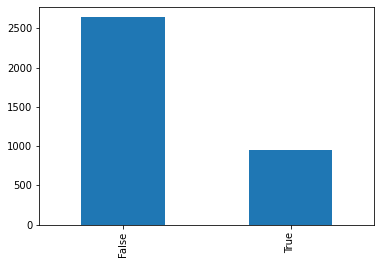

In [9]:
data['Churn'].value_counts().plot(kind='bar')

In [10]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges
Index,,,
3036,1,32,93.95
317,0,38,20.30
565,1,65,107.45
1745,0,72,24.85
2319,0,21,19.60


In [11]:
data.TotalCharges.value_counts().head(10)

         6
19.55    6
20.2     6
19.9     4
20.05    4
45.3     4
20.5     4
20.3     4
44       3
74.3     3
Name: TotalCharges, dtype: int64

In [12]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
test_data.TotalCharges = test_data.TotalCharges.replace(' ', 0).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [13]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges,TotalCharges
Index,,,,
2004,0,35,83.15,2848.45
399,1,38,57.15,2250.65
1160,0,72,106.10,7657.40
2853,0,13,35.40,450.40
3009,0,5,24.30,100.20


In [14]:
# новый признак
#data['AverageCharges'] = data.TotalCharges / data.Tenure
# data['DiffCharges'] = ((data.MonthlyCharges - data.AverageCharges) > 0) + 0
def add_priznak(data=data):
    data['MarriedDependents'] = ((data.Married != 'Yes') & (data.Dependents == 'Yes')) + 0

    data['SeniorDependents'] = ((data.Senior == 1) & (data.Dependents == 'Yes')) + 0
    
    data['AverageCharges'] = (data.TotalCharges / data.Tenure).fillna(0)
    data['DiffCharges'] = (data.MonthlyCharges - (data.TotalCharges / data.Tenure)).fillna(0)
    data['DiffChargesSign'] = ((data.MonthlyCharges - (data.TotalCharges / data.Tenure)).fillna(0) > 0) + 1

    data['Tenure_0'] = (data.Tenure == 0) + 0
    data['Tenure_1'] = (data.Tenure == 1) + 0
    data['Tenure_2'] = (data.Tenure == 2) + 0

add_priznak(data)
add_priznak(test_data)

In [15]:
# data['Churn'] = data['Churn'] | (data.SeniorDependents == 1)

In [16]:
data[data.Tenure == 0]

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,...,TotalCharges,Churn,MarriedDependents,SeniorDependents,AverageCharges,DiffCharges,DiffChargesSign,Tenure_0,Tenure_1,Tenure_2
Index,,,,,,,,,,,,,,,,,,,,,
1302,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,0.0,False,0,0,0.0,0.0,1,1,0,0
1436,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,0.0,False,1,0,0.0,0.0,1,1,0,0
1486,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,0.0,False,0,0,0.0,0.0,1,1,0,0
2578,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,0.0,False,0,0,0.0,0.0,1,1,0,0
3037,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,0.0,False,0,0,0.0,0.0,1,1,0,0
3247,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,0.0,False,0,0,0.0,0.0,1,1,0,0


In [17]:
replaces = {'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Dependents': {'Yes': 1, 'No': 0},
                     
                     'Phone': {'Yes': 1, 'No': 0}, 
                     'MultiplePhones': {'Yes': 3, 'No': 0, 'No phone service': 1}, 
                     
                     'Internet': {'Fiber optic': 2, 'DSL': 1, 'No': 1},
                     'Security': {'Yes': 3, 'No': 0, 'No internet service': 1}, 
                     'Backup': {'Yes': 3, 'No': 0, 'No internet service': 1}, 
                     'Insurance': {'Yes': 3, 'No': 0, 'No internet service': 1}, 
                     'Support': {'Yes': 3, 'No': 0, 'No internet service': 1}, 
                     'TV': {'Yes': 3, 'No': 0, 'No internet service': 1}, 
                     'Movies': {'Yes': 3, 'No': 0, 'No internet service': 1}, 
                     
                     'Contract': {'Month-to-month': 1, 'One year': 12, 'Two year': 24}, 
                     
                     'EBilling': {'Yes': 1, 'No': 0},
                     'PaymentMethod': {'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 3}
                    }

data = data.replace(replaces)
test_data = test_data.replace(replaces)

In [18]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,...,MonthlyCharges,TotalCharges,MarriedDependents,SeniorDependents,AverageCharges,DiffCharges,DiffChargesSign,Tenure_0,Tenure_1,Tenure_2
Index,,,,,,,,,,,,,,,,,,,,,
3398,0,0,1,0,51,1,3,2,0,3,...,106.80,5498.80,0,0,107.820,-1.020,1,0,0,0
610,0,0,0,0,12,1,3,2,0,0,...,96.05,1148.10,0,0,95.675,0.375,2,0,0,0
2143,0,0,0,0,31,1,0,1,1,1,...,20.45,638.55,0,0,20.598,-0.148,1,0,0,0
3119,1,0,0,1,1,1,0,1,0,0,...,45.95,45.95,1,0,45.950,0.000,1,0,1,0
2790,0,0,1,1,26,1,0,1,1,1,...,20.05,505.90,0,0,19.458,0.592,2,0,0,0


In [19]:
data

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,...,TotalCharges,Churn,MarriedDependents,SeniorDependents,AverageCharges,DiffCharges,DiffChargesSign,Tenure_0,Tenure_1,Tenure_2
Index,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,1,67,0,1,1,3,3,...,3623.95,False,0,0,54.089,0.111,2,0,0,0
1,1,0,0,0,34,1,3,1,3,3,...,2088.75,True,0,0,61.434,2.966,2,0,0,0
2,1,1,1,0,72,1,3,2,3,3,...,6827.50,False,0,0,94.826,1.774,2,0,0,0
3,1,0,1,1,63,1,0,1,3,3,...,4014.20,False,0,0,63.717,-0.167,1,0,0,0
4,0,0,1,1,69,1,3,2,0,3,...,6511.25,False,0,0,94.366,1.384,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,1,0,0,0,5,1,0,2,0,0,...,384.25,False,0,0,76.850,3.350,2,0,0,0
3587,1,0,1,1,71,1,0,1,3,0,...,5574.35,False,0,0,78.512,-0.962,1,0,0,0
3588,1,0,1,0,68,1,3,2,0,3,...,5762.95,False,0,0,84.749,1.701,2,0,0,0


<AxesSubplot:>

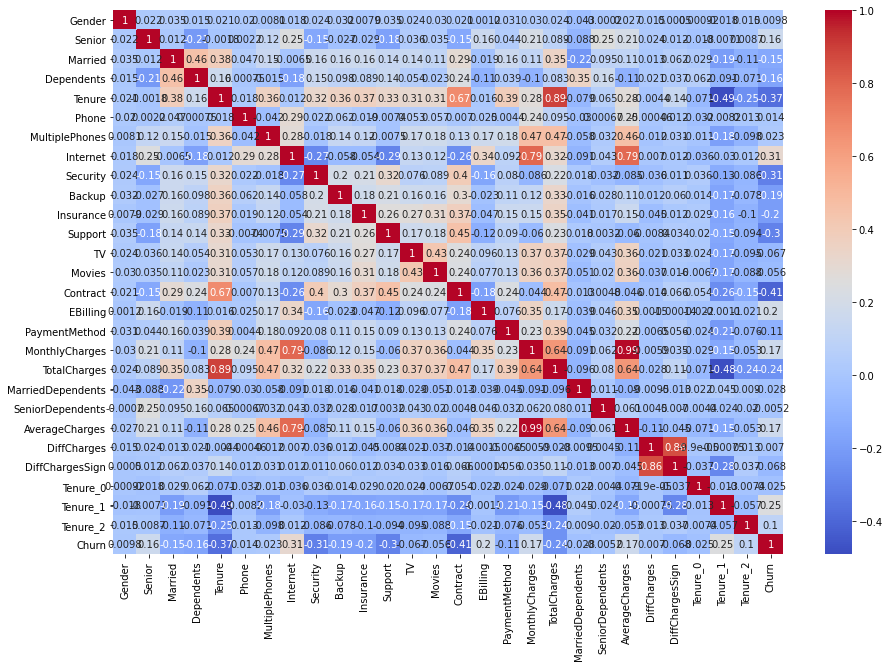

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data[numeric_data.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)

In [21]:
from sklearn.model_selection import train_test_split


X = numeric_data
Y = data.Churn

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y,
                                                    test_size = 0.25,
                                                    random_state = 1)

In [22]:

X_trains = []
X_tests = []
Y_trains = []
Y_tests = []
for i in range(0, 4):
    X_train_i, X_test_i, Y_train_i, Y_test_i = train_test_split(X, Y,test_size = 0.25,random_state = i)
    X_trains.append(X_train_i)
    X_tests.append(X_test_i)
    Y_trains.append(Y_train_i)
    Y_tests.append(Y_test_i)

In [23]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)

dummy_predictions = dummy.predict(X_train)

In [24]:
# print (classification_report(Y_train, dummy_predictions))

# plot_confusion_matrix(estimator=dummy, X= X_train, y_true=Y_train)

              precision    recall  f1-score   support

       False       0.75      1.00      0.86       672
        True       0.00      0.00      0.00       226

    accuracy                           0.75       898
   macro avg       0.37      0.50      0.43       898
weighted avg       0.56      0.75      0.64       898



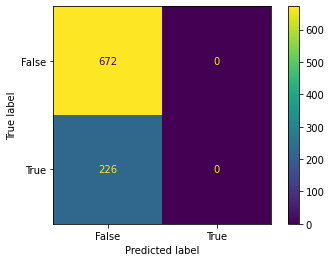

In [25]:
print (classification_report(Y_test, dummy.predict(X_test)))

plot_confusion_matrix(estimator=dummy, X= X_test, y_true=Y_test)

Train evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1967
        True       1.00      1.00      1.00       726

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693



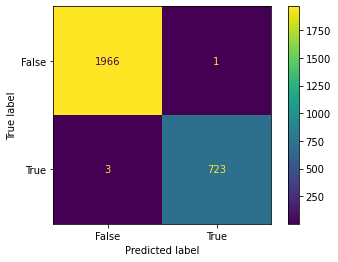

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_train_predictions = dt.predict (X_train)

print('Train evaluation')
print(classification_report(Y_train, dt_train_predictions))
plot_confusion_matrix(estimator = dt, X= X_train, y_true=Y_train)


In [27]:
from sklearn.tree import plot_tree

print (f'Tree depth: {dt.get_depth()}')
fig = plt.figure(figsize=(25, 20), dpi=200)

# plot_tree(dt, filled=True, ax=fig.gca(), fontsize='small');

Tree depth: 21


<Figure size 5000x4000 with 0 Axes>

Test evaluation
              precision    recall  f1-score   support

       False       0.83      0.82      0.82       672
        True       0.47      0.49      0.48       226

    accuracy                           0.73       898
   macro avg       0.65      0.65      0.65       898
weighted avg       0.74      0.73      0.74       898



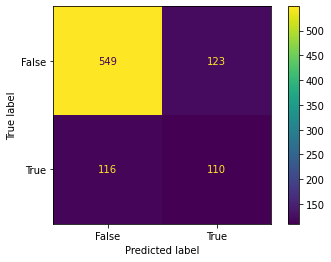

In [28]:
dt_test_predictions = dt.predict (X_test)

print('Test evaluation')
print(classification_report(Y_test, dt_test_predictions))

plot_confusion_matrix(estimator = dt, X= X_test, y_true=Y_test)

In [29]:
#smart_dt = DecisionTreeClassifier(min_samples_leaf = 7, max_depth = 17).fit(X_train, Y_train)
smart_dt = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 100).fit(X_train, Y_train)
print (f'Tree depth: {smart_dt.get_depth()}')

print('Train evaluation')
sdt_train_predictions = smart_dt.predict (X_train)
print(classification_report(Y_train, sdt_train_predictions))

print('Test evaluation')
sdt_test_predictions = smart_dt.predict (X_test)
print(classification_report(Y_test, sdt_test_predictions))


Tree depth: 13
Train evaluation
              precision    recall  f1-score   support

       False       0.88      0.93      0.90      1967
        True       0.77      0.66      0.71       726

    accuracy                           0.86      2693
   macro avg       0.83      0.79      0.81      2693
weighted avg       0.85      0.86      0.85      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.83      0.90      0.86       672
        True       0.60      0.46      0.52       226

    accuracy                           0.79       898
   macro avg       0.72      0.68      0.69       898
weighted avg       0.77      0.79      0.78       898



БЫЛО Test evaluation

       False       0.83      0.89      0.86       672
        True       0.58      0.46      0.52       226

In [30]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

tree_params = {'min_samples_leaf': [5, 7, 9, 11],
               'max_depth': [12, 15, 17, 19],
               'criterion': ['gini', 'entropy']              
              }

grid = GridSearchCV(DecisionTreeClassifier(),
                    tree_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [31]:
grid.best_score_

0.6730561406176573

In [32]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 11}

In [33]:
print('Train evaluation')
gbm_train_predictions = grid_best_model.predict (X_train)
print(classification_report(Y_train, gbm_train_predictions))

print('Test evaluation')
gbm_test_predictions = grid_best_model.predict (X_test)
print(classification_report(Y_test, gbm_test_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      1967
        True       0.75      0.67      0.71       726

    accuracy                           0.85      2693
   macro avg       0.82      0.79      0.80      2693
weighted avg       0.85      0.85      0.85      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.84      0.90      0.87       672
        True       0.61      0.49      0.54       226

    accuracy                           0.79       898
   macro avg       0.73      0.69      0.71       898
weighted avg       0.78      0.79      0.79       898



In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 10, n_estimators = 100)

rfr.fit(X_train, Y_train)
rfr_train_predictions = rfr.predict(X_train) > 0.5

print('Train evaluation')
print(classification_report(Y_train, rfr_train_predictions))

rfr_predictions = rfr.predict(X_test) > 0.5

print('Test evaluation')
# print(classification_report(Y_test, rfr_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1967
        True       1.00      1.00      1.00       726

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693

Test evaluation


In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

lasso = LassoCV()

lasso.fit(X_train_scaled, Y_train)
lasso_train_predictions = lasso.predict(X_train_scaled) > 0.5

print('Train evaluation')
print(classification_report(Y_train, lasso_train_predictions))

lasso_test_predictions = lasso.predict(X_test_scaled) > 0.5

print('Test evaluation')
print(classification_report(Y_test, lasso_test_predictions))

Train evaluation
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1967
        True       0.67      0.48      0.56       726

    accuracy                           0.79      2693
   macro avg       0.75      0.69      0.71      2693
weighted avg       0.78      0.79      0.78      2693

Test evaluation
              precision    recall  f1-score   support

       False       0.84      0.94      0.89       672
        True       0.71      0.47      0.57       226

    accuracy                           0.82       898
   macro avg       0.78      0.70      0.73       898
weighted avg       0.81      0.82      0.81       898



In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 10, n_jobs = -1)

print('Train evaluation')
print(classification_report(Y_train, cv_lr_predictions))


Train evaluation
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1967
        True       0.61      0.53      0.57       726

    accuracy                           0.78      2693
   macro avg       0.72      0.70      0.71      2693
weighted avg       0.78      0.78      0.78      2693



In [37]:

lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict (X_test)
print(classification_report(Y_test, lr_test_predictions))


Test evaluation
              precision    recall  f1-score   support

       False       0.85      0.92      0.88       672
        True       0.68      0.52      0.59       226

    accuracy                           0.82       898
   macro avg       0.76      0.72      0.74       898
weighted avg       0.81      0.82      0.81       898



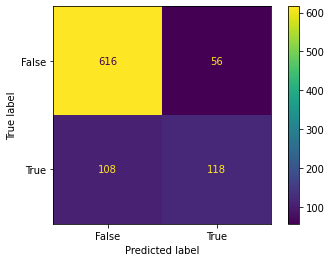

In [38]:
plot_confusion_matrix(estimator = lr, X= X_test, y_true=Y_test)

In [39]:
category_data = data.select_dtypes(exclude=np.number)
category_data.sample(5)

,Churn
Index,
446,False
662,False
2721,False
2670,False
1846,False


# COEF_

In [40]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.DataFrame(lasso.coef_,  X.columns, columns=['coef_'])

,coef_
Gender,0.00498
Senior,0.02250
Married,0.00365
Dependents,-0.00434
Tenure,-0.00403
Phone,-0.03174
MultiplePhones,0.01898
Internet,0.05215
Security,-0.03053
Backup,-0.00873


In [41]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.DataFrame(lr.coef_[0],  X.columns, columns=['coef_'])

,coef_
Gender,-0.00410
Senior,0.06547
Married,-0.00415
Dependents,-0.04495
Tenure,-0.06319
Phone,-0.10668
MultiplePhones,0.07620
Internet,0.00999
Security,-0.21859
Backup,-0.10395


# МЕТЬЮСЫ 

In [66]:
def train_predict(algo, X_train, Y_train, X_test, threshold):
    algo.fit(X_train, Y_train)
    result = algo.predict(X_test)
    if (threshold == None):
        return result
    else: 
        return result > threshold

def print_mathewses(algo, threshold = None):
    res = []
    for i in range(len(X_trains)):
        predict = train_predict(algo, X_trains[i], Y_trains[i], X_tests[i], threshold)
        res.append(matthews_corrcoef(Y_tests[i], predict))
    print("# avg:", round(np.mean(res), 5))
    print("# min:", round(np.min(res), 5))
    # [print(r) for r in res]

In [67]:
## DecisionTreeClassifier
print_mathewses(dt)
#avg: 0.28369
#min: 0.26293

# avg: 0.31122
# min: 0.2891


In [68]:
# RandomForestRegressor
print_mathewses(rfr, threshold = 0.5)
#avg: 0.39621
#min: 0.3581

# avg: 0.42478
# min: 0.39548


In [69]:
# LassoCV
print_mathewses(lasso, threshold = 0.5)
#avg: 0.40694
#min: 0.3808

# avg: 0.40768
# min: 0.39128


In [70]:
# LogisticRegression
print_mathewses(lr)
#avg: 0.45847
#min: 0.43662

# avg: 0.44036
# min: 0.40566


In [47]:
## Dummy
dummy_test_predictions = dummy.predict(X_test)
matthews_corrcoef(Y_test, dummy_test_predictions)
# 0.0

0.0

In [48]:
## DecisionTreeClassifier
matthews_corrcoef(Y_test, dt_test_predictions)

# 0.3104664750197529

0.3006633500779578

In [49]:
# GridSearchCV
matthews_corrcoef(Y_test, gbm_test_predictions)

# 0.35699290062035866

0.4171885464427201

In [50]:
# RandomForestRegressor
matthews_corrcoef(Y_test, rfr_predictions)

# 0.42220335775146667

0.469983790729405

In [51]:
# LassoCV
matthews_corrcoef(Y_test, lasso_test_predictions)

# 0.4637326264022254

0.476384187867514

In [52]:
# LogisticRegression
matthews_corrcoef(Y_test, lr_test_predictions)

# 0.48876282691470774

0.48178383585429513

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 2, n_jobs = -1)


lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict (X_test)

# LogisticRegression
print(matthews_corrcoef(Y_test, lr_test_predictions))

print(0.48876282691470774)

Test evaluation
0.48178383585429513
0.48876282691470774


In [54]:
# test_data

# ПОСЫЛКА

In [55]:
lr = LogisticRegression()
lr = LogisticRegression().fit(X, Y) # !!!!!!!!!!! ТРЕНИРУЕМ НА ВСЁМ ЧТО ЕСТЬ
lr_result_predictions = lr.predict(test_data)

df = pd.DataFrame({'Churn': lr_result_predictions})
df.to_csv('submission.csv',index_label="Index")